# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy.stats import t
from scipy.stats import chi2
from scipy.stats import pearsonr

from pingouin import multivariate_normality

from itertools import combinations

from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.diagnostic import lilliefors

from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('data/ANOVA_01_2026-01-27_B.csv')

In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   Index       100 non-null    int64  
 2   X_1         100 non-null    float64
 3   X_2         100 non-null    float64
 4   X_3         100 non-null    float64
 5   X_4         100 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 4.8 KB


In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.describe()

,Index,X_1,X_2,X_3,X_4
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,0.791790,0.782639,0.829316,0.802692
std,29.011492,0.331912,0.335075,0.327502,0.350614
min,1.000000,0.043293,-0.281425,-0.022263,0.114507
25%,25.750000,0.555926,0.565193,0.625905,0.583083
50%,50.500000,0.821644,0.840238,0.846239,0.748333
75%,75.250000,1.006917,1.008533,1.054503,1.035575
max,100.000000,1.551541,1.433671,1.605139,1.648295


In [6]:
columns = df.columns[1:]

# TODO: A COSA SERVE?

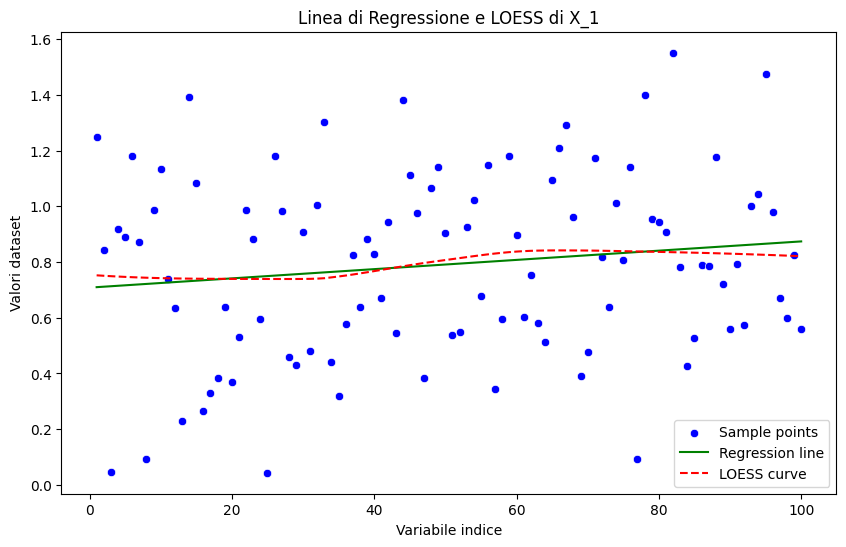

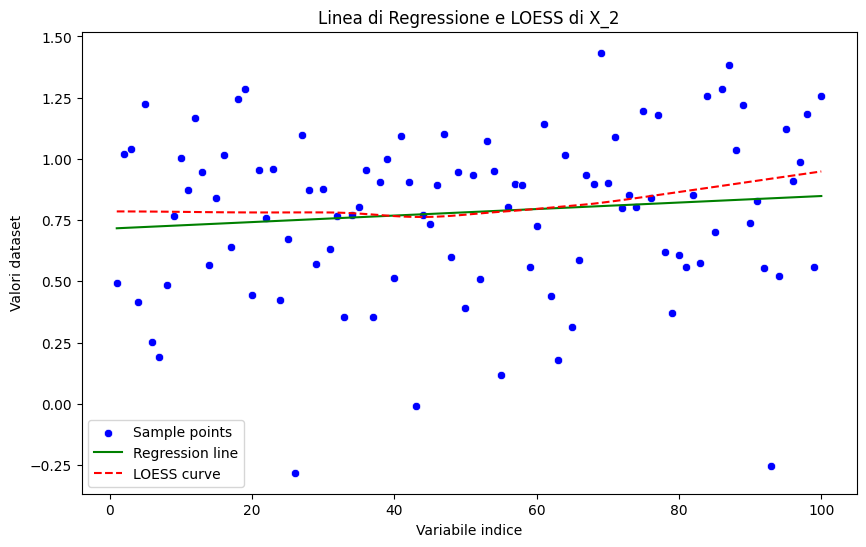

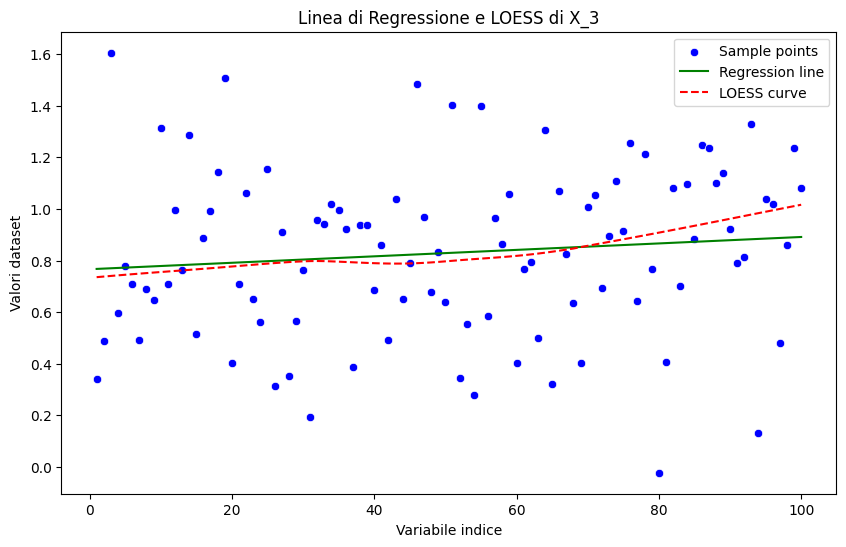

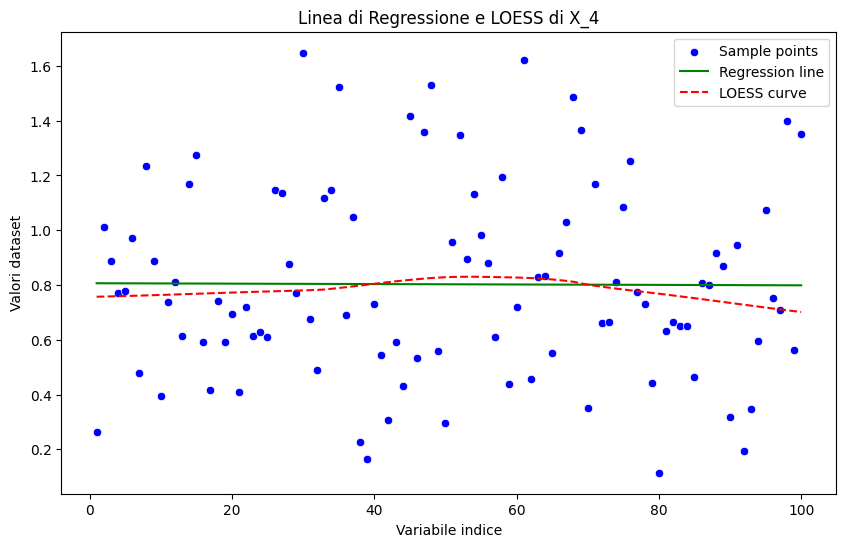

In [8]:
def plot_regression_loess(data, col, index_col = "Index"):
        X = data[[index_col]].values.reshape(-1, 1)
        y = data[col].values

        model = LinearRegression().fit(X, y)
        y_pred = model.predict(X)

        lowess = sm.nonparametric.lowess
        loess_smoothed = lowess(y, data[index_col])

        plt.figure(figsize = (10, 6))
        sns.scatterplot(x = index_col, y = col, data = data, color = 'blue', label= 'Sample points')
        plt.plot(data[index_col], y_pred, color = 'green', label = 'Regression line')
        plt.plot(data[index_col], loess_smoothed[:, 1], color = 'red', label = 'LOESS curve', linestyle = '--')

        plt.title(f'Linea di Regressione e LOESS di {col}')
        plt.xlabel('Variabile indice')
        plt.ylabel('Valori dataset')
        plt.legend()
        plt.show()

for col in columns:
    plot_regression_loess(df, col)

# Indipendenza

Si vogliono avere delle rassicurazioni sul fatto che non esistano relazioni di correlazione significative tra le osservazioni di un campione.

## Autocorrelazione

La **tolleranza rigorosa** per i picchi è:
- $\alpha=0.10$: $\lfloor (\text{maxlag}\cdot 0.10  \rfloor = \lfloor (10\cdot 0.10  \rfloor = 1$
- $\alpha=0.05$: $\lfloor (\text{maxlag}\cdot 0.05  \rfloor = \lfloor (10\cdot 0.05  \rfloor = 0$
- $\alpha=0.01$: $\lfloor (\text{maxlag}\cdot 0.01  \rfloor = \lfloor (10\cdot 0.01  \rfloor = 0$


--- Analysis for X_1 ---
90% CI: 1 points outside (Allowed: 1) -> PASS
95% CI: 1 points outside (Allowed: 0) -> FAIL
99% CI: 0 points outside (Allowed: 0) -> PASS


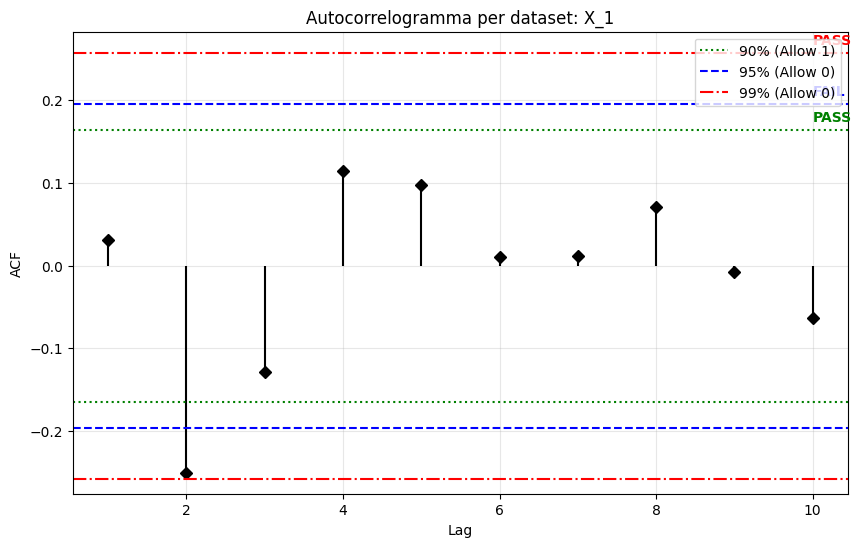


--- Analysis for X_2 ---
90% CI: 1 points outside (Allowed: 1) -> PASS
95% CI: 0 points outside (Allowed: 0) -> PASS
99% CI: 0 points outside (Allowed: 0) -> PASS


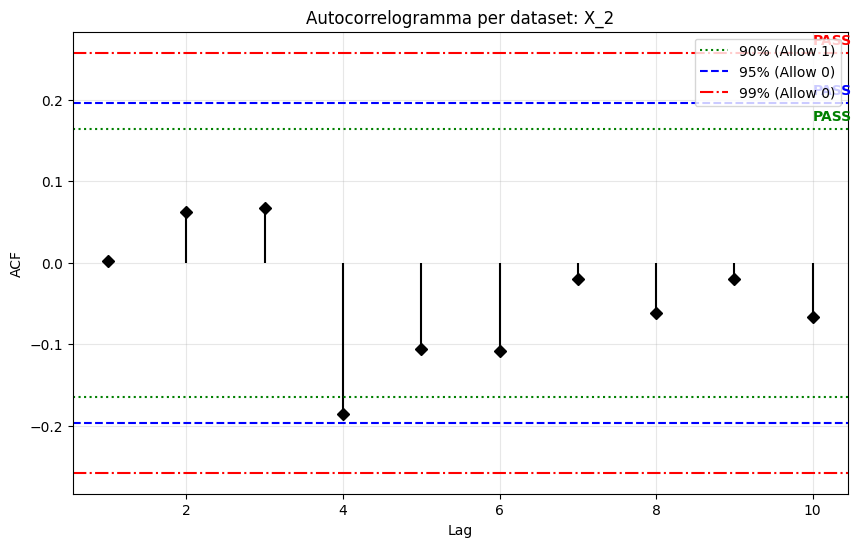


--- Analysis for X_3 ---
90% CI: 2 points outside (Allowed: 1) -> FAIL
95% CI: 0 points outside (Allowed: 0) -> PASS
99% CI: 0 points outside (Allowed: 0) -> PASS


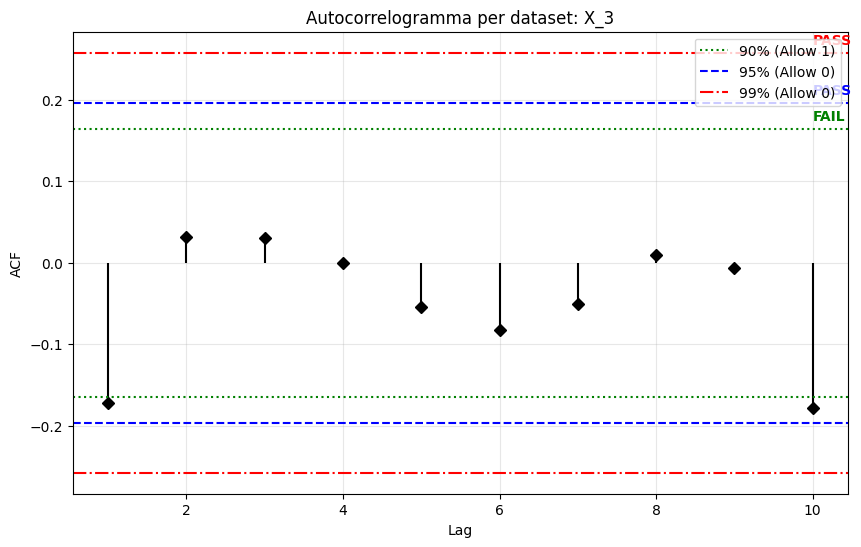


--- Analysis for X_4 ---
90% CI: 0 points outside (Allowed: 1) -> PASS
95% CI: 0 points outside (Allowed: 0) -> PASS
99% CI: 0 points outside (Allowed: 0) -> PASS


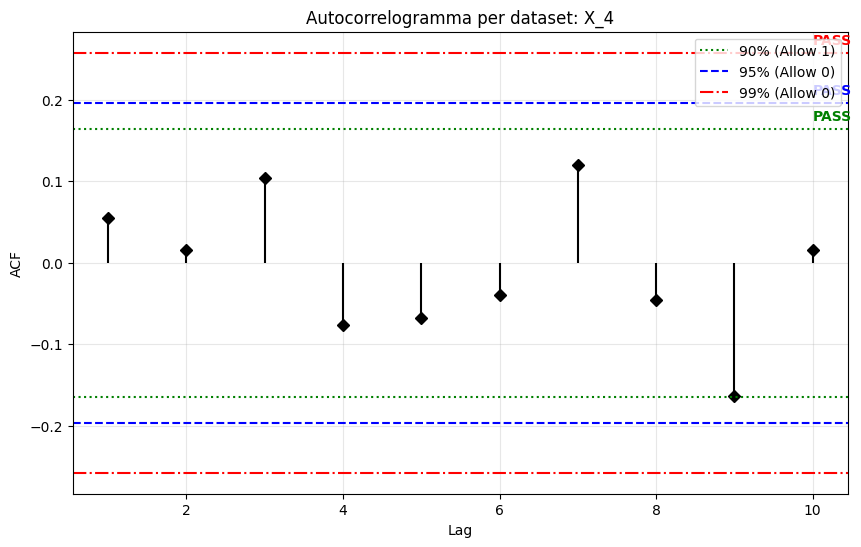

In [17]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

def analyze_strict_tolerance(data, col, lags=10):
    acf_values = sm.tsa.acf(data[col], nlags=lags, fft=False)
    acf_to_test = acf_values[1:]

    n = len(data)

    rules = {
        '90%': {
            'z': stats.norm.ppf((1 + 0.9) / 2) / np.sqrt(n),
            'allowed': 1,
            'color': 'green',
            'style': ':'
        },
        '95%': {
            'z': stats.norm.ppf((1 + 0.95) / 2) / np.sqrt(n),
            'allowed': 0,
            'color': 'blue',
            'style': '--'
        },
        '99%': {
            'z': stats.norm.ppf((1 + 0.99) / 2) / np.sqrt(n),
            'allowed': 0,
            'color': 'red',
            'style': '-.'
        }
    }

    print(f"\n--- Analysis for {col} ---")

    plt.figure(figsize=(10, 6))
    plt.title(f'Autocorrelogramma per dataset: {col}')
    plt.stem(range(1, lags + 1), acf_to_test, linefmt='k-', markerfmt='kD', basefmt=" ")

    for label, params in rules.items():
        limit = params['z']
        count = np.sum(np.abs(acf_to_test) > limit)
        status = "PASS" if count <= params['allowed'] else "FAIL"
        print(f"{label} CI: {count} points outside (Allowed: {params['allowed']}) -> {status}")
        plt.axhline(y=limit, color=params['color'], linestyle=params['style'], label=f'{label} (Allow {params["allowed"]})')
        plt.axhline(y=-limit, color=params['color'], linestyle=params['style'])
        plt.text(lags, limit + 0.01, f"{status}", color=params['color'], fontweight='bold')
    plt.xlabel('Lag')
    plt.ylabel('ACF')
    plt.legend(loc='upper right')
    plt.grid(True, alpha=0.3)
    plt.show()

for col in columns:
    analyze_strict_tolerance(df, col)

## Autocorrelazione Parziale


--- Analysis for X_1 ---
90% CI: 1 points outside (Allowed: 1) -> PASS
95% CI: 1 points outside (Allowed: 0) -> FAIL
99% CI: 0 points outside (Allowed: 0) -> PASS


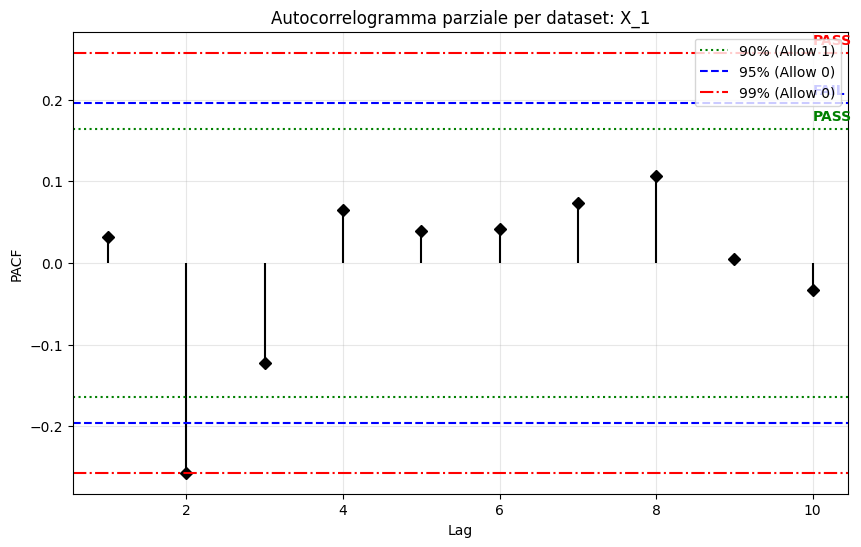


--- Analysis for X_2 ---
90% CI: 1 points outside (Allowed: 1) -> PASS
95% CI: 1 points outside (Allowed: 0) -> FAIL
99% CI: 0 points outside (Allowed: 0) -> PASS


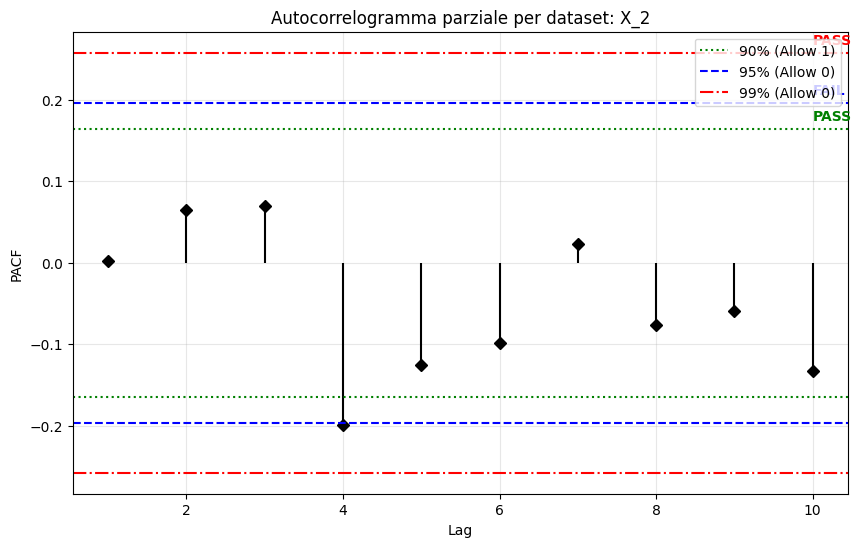


--- Analysis for X_3 ---
90% CI: 2 points outside (Allowed: 1) -> FAIL
95% CI: 1 points outside (Allowed: 0) -> FAIL
99% CI: 0 points outside (Allowed: 0) -> PASS


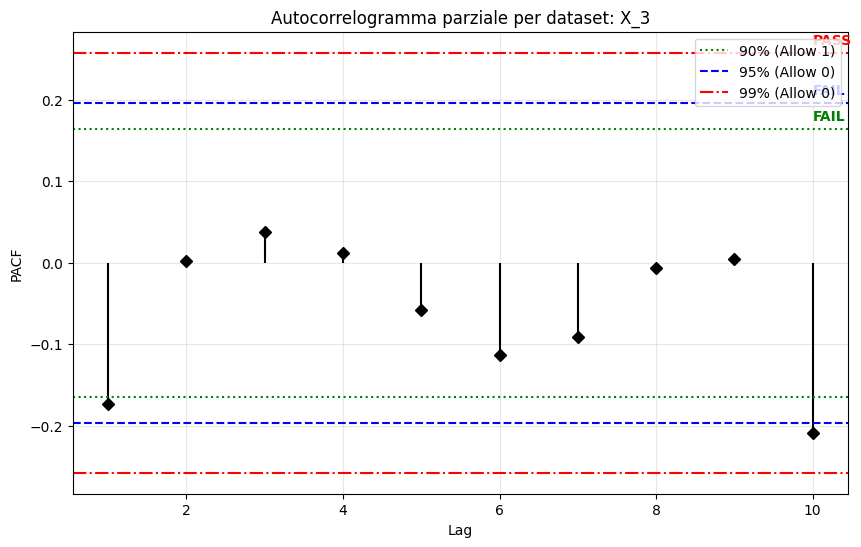


--- Analysis for X_4 ---
90% CI: 1 points outside (Allowed: 1) -> PASS
95% CI: 0 points outside (Allowed: 0) -> PASS
99% CI: 0 points outside (Allowed: 0) -> PASS


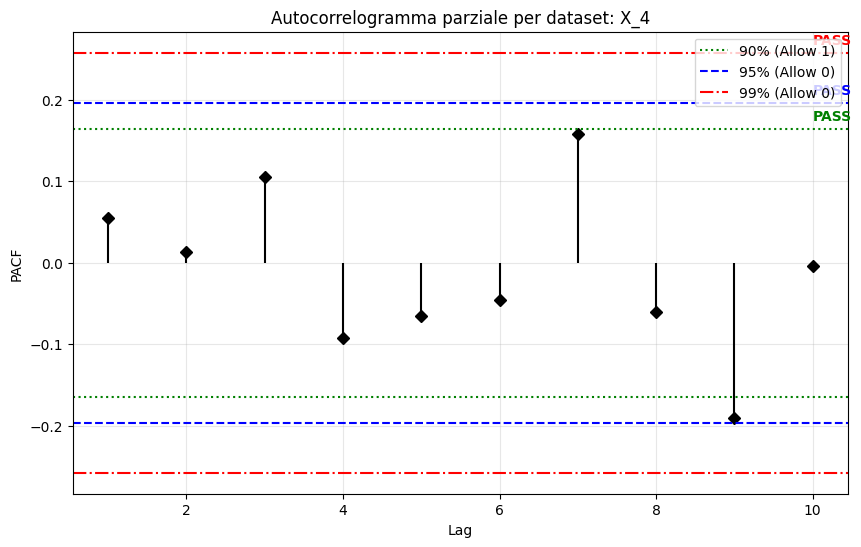

In [21]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

def analyze_strict_tolerance(data, col, lags=10):
    acf_values = sm.tsa.pacf(data[col], nlags=lags)
    acf_to_test = acf_values[1:]

    n = len(data)

    rules = {
        '90%': {
            'z': stats.norm.ppf((1 + 0.9) / 2) / np.sqrt(n),
            'allowed': 1,
            'color': 'green',
            'style': ':'
        },
        '95%': {
            'z': stats.norm.ppf((1 + 0.95) / 2) / np.sqrt(n),
            'allowed': 0,
            'color': 'blue',
            'style': '--'
        },
        '99%': {
            'z': stats.norm.ppf((1 + 0.99) / 2) / np.sqrt(n),
            'allowed': 0,
            'color': 'red',
            'style': '-.'
        }
    }

    print(f"\n--- Analysis for {col} ---")

    plt.figure(figsize=(10, 6))
    plt.title(f'Autocorrelogramma parziale per dataset: {col}')
    plt.stem(range(1, lags + 1), acf_to_test, linefmt='k-', markerfmt='kD', basefmt=" ")

    for label, params in rules.items():
        limit = params['z']
        count = np.sum(np.abs(acf_to_test) > limit)
        status = "PASS" if count <= params['allowed'] else "FAIL"
        print(f"{label} CI: {count} points outside (Allowed: {params['allowed']}) -> {status}")
        plt.axhline(y=limit, color=params['color'], linestyle=params['style'], label=f'{label} (Allow {params["allowed"]})')
        plt.axhline(y=-limit, color=params['color'], linestyle=params['style'])
        plt.text(lags, limit + 0.01, f"{status}", color=params['color'], fontweight='bold')
    plt.xlabel('Lag')
    plt.ylabel('PACF')
    plt.legend(loc='upper right')
    plt.grid(True, alpha=0.3)
    plt.show()

for col in columns:
    analyze_strict_tolerance(df, col)

## Test di Ljung-Box
Questo test assume come **ipotesi nulla** che non ci sia autocorrelazione fino al lag specificato.

In [24]:
def ljungbox_test(group):
    n = len(group)
    max_lag = min(10, n // 4)
    fit_df = 0

    lb_result = sm.stats.acorr_ljungbox(group, lags = max_lag, return_df = True, model_df = fit_df)

    print(f"Ljung-Box test for {col} (max_lag={max_lag}):")
    print(lb_result)
    print()
    if np.sum(np.abs(lb_result['lb_pvalue']) < 0.01):
        print(f"WARNING: it seems that {col} is not stationary (p-value < 0.01)")

for col in columns:
    ljungbox_test(df[col])

Ljung-Box test for X_1 (max_lag=10):
      lb_stat  lb_pvalue
1    0.099322   0.752645
2    6.629320   0.036346
3    8.367622   0.038995
4    9.764863   0.044580
5   10.776255   0.056001
6   10.788740   0.095129
7   10.802951   0.147448
8   11.359590   0.182145
9   11.366580   0.251416
10  11.827453   0.296770

Ljung-Box test for X_2 (max_lag=10):
     lb_stat  lb_pvalue
1   0.000291   0.986387
2   0.410471   0.814455
3   0.891483   0.827483
4   4.546605   0.337057
5   5.762752   0.329993
6   7.025405   0.318504
7   7.067244   0.421912
8   7.484406   0.485380
9   7.529912   0.582122
10  8.033013   0.625612

Ljung-Box test for X_3 (max_lag=10):
     lb_stat  lb_pvalue
1   3.034324   0.081521
2   3.135322   0.208532
3   3.230550   0.357426
4   3.230564   0.520008
5   3.544006   0.616740
6   4.279796   0.638870
7   4.560532   0.713416
8   4.570098   0.802380
9   4.575483   0.869635
10  8.178475   0.611409

Ljung-Box test for X_4 (max_lag=10):
     lb_stat  lb_pvalue
1   0.308667   0.57850

Poiché tutti i p-value per le variabili del test di Ljung-Box sono maggiori di α=0.01, non abbiamo evidenza statistica sufficiente per rifiutare l'ipotesi nulla di assenza di autocorrelazione fino al lag specificato.

Ovviamente, sottolineiamo ancora come il test non conferma la scorrelazione, ma piuttosto che non c'è evidenza sufficiente per dimostrare il contrario (come detto più volte a lezione: l'assenza di prove a un processo non implica necessariamente innocenza).

Dunque, non possiamo rifiutare l'ipotesi nulla: i dati non sono autocorrelati e potrebbero essere stati generati in modo indipendente.

## Cross-Correlazione

### Matrice di Varianza-Covarianza
**TODO: QUALI VALORI SONO CONSIDERATI ALTI??**

In [25]:
def calculate_cov_matrix(df, columns):
    cov_matrix = df[columns].cov()
    return cov_matrix

cov_matrix = calculate_cov_matrix(df, columns)
print(cov_matrix)

          X_1       X_2       X_3       X_4
X_1  0.110166 -0.021406 -0.005518  0.001721
X_2 -0.021406  0.112275  0.029388  0.023079
X_3 -0.005518  0.029388  0.107258  0.000780
X_4  0.001721  0.023079  0.000780  0.122930


### Matrice di cross-correlazione
**TODO:** CHIEDERE QUALI VALORI SONO CONSIDERATI ALTI?

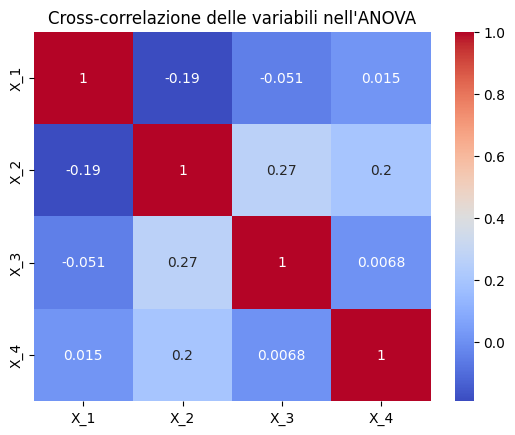

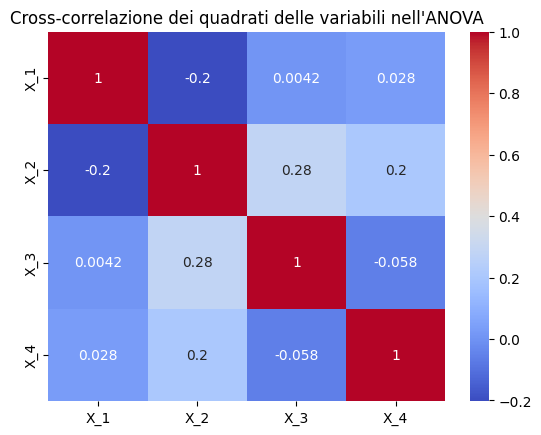

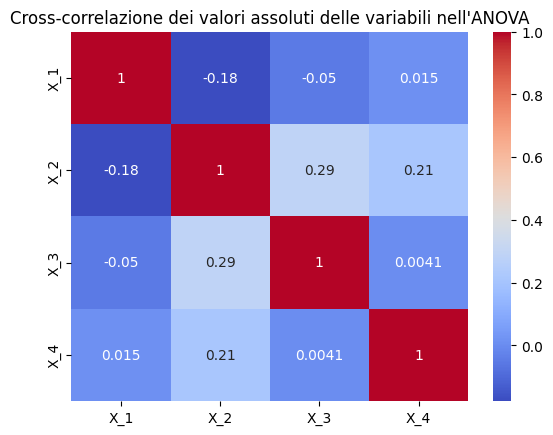

In [26]:
def plot_corr_heatmap(data, title):
    corr_matrix = data.corr()

    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title(title)
    plt.show()

plot_corr_heatmap(df.drop(columns='Index'), "Cross-correlazione delle variabili nell'ANOVA")

squared_df = df.drop(columns='Index') ** 2
plot_corr_heatmap(squared_df, "Cross-correlazione dei quadrati delle variabili nell'ANOVA")

abs_df = df.drop(columns='Index').abs()
plot_corr_heatmap(abs_df, "Cross-correlazione dei valori assoluti delle variabili nell'ANOVA")

### Test di Pearson
Il test di Pearson misura la forza della relazione lineare tra due variabili, fornendo coefficiente di correlazione r e p-value associato (si limita a relazioni lineari e potrebbe non rilevare correlazioni non lineari). Ha come:
- $H_0:$ la distribuzione delle variabili SONO non correlate e normalmente distribuite
- $H_1:$ la distribuzione delle variabili NON non correlate e normalmente distribuite

In [27]:
def pearson_corr(data, alpha = 0.10):
    for col1, col2 in combinations(columns, 2):
        corr_coeff, p_value = pearsonr(df[col1], data[col2])

        print(f"Pearson correlation between {col1} and {col2}")
        print(f"Correlation coefficient: {corr_coeff}")
        print(f"P-value: {p_value}")

        if p_value > alpha:
            print(f"\033[1m** Conclusione: p-value > {alpha} **\n[{col1}; {col2}] Non rifiutiamo l'ipotesi nulla al livello di significatività del {int(alpha * 100)}% -> Le variabili SONO non correlate e normalmente distribuite. \033[0m")
        else:
            print(f"\033[1m** Conclusione: p-value <= {alpha} **\n[{col1}; {col2}] Rifiutiamo l'ipotesi nulla al livello di significatività del {int(alpha * 100)}% -> Le variabili NON sono non correlate e normalmente distribuite. \033[0m")

        print()

pearson_corr(df, alpha = 0.01)

Pearson correlation between X_1 and X_2
Correlation coefficient: -0.19247551013395298
P-value: 0.0550430786834985
** Conclusione: p-value > 0.01 **
[X_1; X_2] Non rifiutiamo l'ipotesi nulla al livello di significatività del 1% -> Le variabili SONO non correlate e normalmente distribuite. 

Pearson correlation between X_1 and X_3
Correlation coefficient: -0.05076322689143011
P-value: 0.6159674620787187
** Conclusione: p-value > 0.01 **
[X_1; X_3] Non rifiutiamo l'ipotesi nulla al livello di significatività del 1% -> Le variabili SONO non correlate e normalmente distribuite. 

Pearson correlation between X_1 and X_4
Correlation coefficient: 0.014785122368854674
P-value: 0.8839211264544019
** Conclusione: p-value > 0.01 **
[X_1; X_4] Non rifiutiamo l'ipotesi nulla al livello di significatività del 1% -> Le variabili SONO non correlate e normalmente distribuite. 

Pearson correlation between X_2 and X_3
Correlation coefficient: 0.2677980104857513
P-value: 0.0070663944943846506
** Conclusio

### Likelihood Ratio Test
Il test LR confronta un modello completo (che include tutte le variabili di interesse) e un modello ridotto (che include solo una parte di esse). In particolare, confronta la log-verosimiglianza dei due modelli. Ha come:
- $H_0:$ Le matrici di covarianza del modello completo e del modello ridotto SONO uguali
- $H_1:$ Le matrici di covarianza del modello completo e del modello ridotto NON sono uguali

In [29]:
def lr_test(data, alpha = 0.10):
    n, p = data.shape

    cov_matrix_full = np.cov(df, rowvar = False)
    cov_matrix_reduced = np.diag(np.diag(cov_matrix_full))

    # identity_matrix = np.identity(cov_matrix_full.shape[0])

    log_likelihood_full = -n * (p / 2) * np.log(2 * np.pi) - n / 2 * np.log(np.linalg.det(cov_matrix_full)) - n / 2 * np.trace(np.dot(np.linalg.inv(cov_matrix_full), cov_matrix_full))
    log_likelihood_reduced = -n * (p / 2) * np.log(2 * np.pi) - n / 2 * np.log(np.linalg.det(cov_matrix_reduced)) - n / 2 * np.trace(np.dot(np.linalg.inv(cov_matrix_reduced), cov_matrix_full))

    lr_stat = 2 * (log_likelihood_full - log_likelihood_reduced)

    data = p * (p - 1) /2
    p_value = 1 - chi2.cdf(lr_stat, data)

    print(f"Likelihood ratio test")
    print(f"Test statistic: {lr_stat}")
    print(f"P-value: {p_value}")

    if p_value > alpha:
        print(f"\033[1m** Conclusione: p-value > {alpha} **\nNon rifiutiamo l'ipotesi nulla al livello di significatività del {int(alpha * 100)}% -> le matrici di covarianza del modello completo e del modello ridotto SONO uguali. \033[0m")
    else:
        print(f"\033[1m** Conclusione: p-value <= {alpha} **\nRifiutiamo l'ipotesi nulla al livello di significatività del {int(alpha * 100)}% -> le matrici di covarianza del modello completo e del modello ridotto NON sono uguali. \033[0m")

lr_test(df, alpha = 0.01)

Likelihood ratio test
Test statistic: 20.856830232000902
P-value: 0.022114316702599557
** Conclusione: p-value > 0.01 **
Non rifiutiamo l'ipotesi nulla al livello di significatività del 1% -> le matrici di covarianza del modello completo e del modello ridotto SONO uguali. 


# Gaussianità

## Shapiro-Wilk Test

Questo test è uno dei più potenti per la verifica della normalità, specialmente con campioni piccoli o medi. È molto sensibile a deviazioni dalla normalità sia nelle code che nella parte centrale della distribuzione. Ha come:
- $H_0:$ i dati PROVENGONO da una distribuzione normale
- $H_1:$ i dati NON provengono da una distribuzione normale

In [30]:
def shapirowilk_test(group, alpha = 0.10, isResidual = False, isDep = False):
    stat, p = stats.shapiro(group)

    print(f"[{col}] Shapiro-Wilk test: {stat}, p-value: {p}")

    if p > alpha:
        print(f"\033[1m** Conclusione: p-value > {alpha} **\nNon possiamo rigettare l'ipotesi nulla con un livello di significatività del {int(alpha * 100)}% -> I dati SEGUONO una distribuzione normale. \033[0m")
    else:
        print(f"\033[1m** Conclusione: p-value <= {alpha} **\nRigettiamo l'ipotesi nulla con un livello di significatività del {int(alpha * 100)}% -> I dati NON seguono una distribuzione normale. \033[0m")

    print()

for col in columns:
    shapirowilk_test(df[col], alpha = 0.01)

[X_1] Shapiro-Wilk test: 0.9897098143740144, p-value: 0.6411645016328533
** Conclusione: p-value > 0.01 **
Non possiamo rigettare l'ipotesi nulla con un livello di significatività del 1% -> I dati SEGUONO una distribuzione normale. 

[X_2] Shapiro-Wilk test: 0.9673964925014231, p-value: 0.014020264221820029
** Conclusione: p-value > 0.01 **
Non possiamo rigettare l'ipotesi nulla con un livello di significatività del 1% -> I dati SEGUONO una distribuzione normale. 

[X_3] Shapiro-Wilk test: 0.9953822877586794, p-value: 0.9837876526316345
** Conclusione: p-value > 0.01 **
Non possiamo rigettare l'ipotesi nulla con un livello di significatività del 1% -> I dati SEGUONO una distribuzione normale. 

[X_4] Shapiro-Wilk test: 0.9773099970891778, p-value: 0.08187508489384335
** Conclusione: p-value > 0.01 **
Non possiamo rigettare l'ipotesi nulla con un livello di significatività del 1% -> I dati SEGUONO una distribuzione normale. 



## D'Agostino-Pearson Test
Il test di D'Agostino-Pearson e il test di Jarque-Bera combinano test di skewness e kurtosis per verificare la normalità e sono più adatti per campioni più grandi. Tuttavia, sono meno sensibili alle deviazioni rispetto a Shapiro-Wilk, specialmente per campioni piccoli e medi. Entrambi hanno come:
- $H_0:$ i dati PROVENGONO da una distribuzione normale,
- $H_1:$ i dati NON provengono da una distribuzione normale.


In [31]:
def dagostino_pearson_test(group, alpha = 0.10, isResidual = False, isDep = False):
    dago_test_stat, dago_p_value = stats.normaltest(group)

    if isResidual == True:
        print(f"D'Agostino-Pearson test per i residui:")
    elif isDep == True:
        print(f"D'Agostino-Pearson test per la variabile dipendente:")
    else:
        print(f"D'Agostino-Pearson test per {col}:")

    print(f"Test statistic: {dago_test_stat}")
    print(f"P-value: {dago_p_value}")

    if dago_p_value > alpha:
        print(f"\033[1m** Conclusione DP: p-value > {alpha} **\nNon possiamo rigettare l'ipotesi nulla con un livello di significatività del {int(alpha * 100)}% -> I dati SEGUONO una distribuzione normale. \033[0m")
    else:
        print(f"\033[1m** Conclusione DP: p-value <= {alpha} **\nRigettiamo l'ipotesi nulla con un livello di significatività del {int(alpha * 100)}% -> I dati NON seguono una distribuzione normale. \033[0m")

    print()

for col in columns:
    dagostino_pearson_test(df[col], alpha = 0.01)

D'Agostino-Pearson test per X_1:
Test statistic: 1.006403543955091
P-value: 0.6045917924046833
** Conclusione DP: p-value > 0.01 **
Non possiamo rigettare l'ipotesi nulla con un livello di significatività del 1% -> I dati SEGUONO una distribuzione normale. 

D'Agostino-Pearson test per X_2:
Test statistic: 10.017260726454928
P-value: 0.006680046280577191
** Conclusione DP: p-value <= 0.01 **
Rigettiamo l'ipotesi nulla con un livello di significatività del 1% -> I dati NON seguono una distribuzione normale. 

D'Agostino-Pearson test per X_3:
Test statistic: 0.37955462284915065
P-value: 0.8271433088008918
** Conclusione DP: p-value > 0.01 **
Non possiamo rigettare l'ipotesi nulla con un livello di significatività del 1% -> I dati SEGUONO una distribuzione normale. 

D'Agostino-Pearson test per X_4:
Test statistic: 3.419701431644591
P-value: 0.18089279503371442
** Conclusione DP: p-value > 0.01 **
Non possiamo rigettare l'ipotesi nulla con un livello di significatività del 1% -> I dati SE

# Jarque-Bera Test
- $H_0:$ i dati PROVENGONO da una distribuzione normale,
- $H_1:$ i dati NON provengono da una distribuzione normale.

In [33]:
def jarque_bera_test(group, alpha = 0.10, isResidual = False, isDep = False):
    jb_test_stat, jb_p_value = stats.jarque_bera(group)

    if isResidual == True:
        print(f"Jarque-Bera test per i residui:")
    elif isDep == True:
        print(f"Jarque-Bera test per la variabile dipendente:")
    else:
        print(f"Jarque-Bera test per {col}:")


    print(f"Test statistic: {jb_test_stat}")
    print(f"P-value: {jb_p_value}")

    if jb_p_value > alpha:
        print(f"\033[1m** Conclusione JB: p-value > {alpha} **\nNon possiamo rigettare l'ipotesi nulla con un livello di significatività del {int(alpha * 100)}% -> I dati SEGUONO una distribuzione normale. \033[0m")
    else:
        print(f"\033[1m** Conclusione JB: p-value <= {alpha} **\nRigettiamo l'ipotesi nulla con un livello di significatività del {int(alpha * 100)}% -> I dati NON seguono una distribuzione normale. \033[0m")

    print()

for col in columns:
    jarque_bera_test(df[col], alpha = 0.01)

Jarque-Bera test per X_1:
Test statistic: 1.0001611962367742
P-value: 0.6064817764526924
** Conclusione JB: p-value > 0.01 **
Non possiamo rigettare l'ipotesi nulla con un livello di significatività del 1% -> I dati SEGUONO una distribuzione normale. 

Jarque-Bera test per X_2:
Test statistic: 9.980640714659351
P-value: 0.006803484596918509
** Conclusione JB: p-value <= 0.01 **
Rigettiamo l'ipotesi nulla con un livello di significatività del 1% -> I dati NON seguono una distribuzione normale. 

Jarque-Bera test per X_3:
Test statistic: 0.54502570542999
P-value: 0.7614636422371384
** Conclusione JB: p-value > 0.01 **
Non possiamo rigettare l'ipotesi nulla con un livello di significatività del 1% -> I dati SEGUONO una distribuzione normale. 

Jarque-Bera test per X_4:
Test statistic: 3.3641419688177217
P-value: 0.185988397841844
** Conclusione JB: p-value > 0.01 **
Non possiamo rigettare l'ipotesi nulla con un livello di significatività del 1% -> I dati SEGUONO una distribuzione normale.

## Test di Anderson-Darling
- $H_0:$ i dati PROVENGONO da una distribuzione normale,
- $H_1:$ i dati NON provengono da una distribuzione normale.

In [35]:
def anderson_darling_test(group, alpha = 0.10):
    result = stats.anderson(group)

    print(f"[{col}] Anderson-Darling test")
    print(f"Statistic: {result.statistic}")

    # valore critico più vicino al livello di significatività scelto
    significance_index = (result.significance_level / 100 <= alpha).nonzero()[0]

    critical_value = result.critical_values[significance_index[0]]
    print(f"Using critical value at {result.significance_level[significance_index[0]]}% significance level: {critical_value}")

    if result.statistic < critical_value:
        print(f"\033[1m** Conclusione: Statistica < {critical_value} **\nNon possiamo rigettare l'ipotesi nulla con un livello di significatività del {int(alpha * 100)}% -> I dati SEGUONO una distribuzione normale. \033[0m")
    else:
        print(f"\033[1m** Conclusione: Statistica >= {critical_value} **\nRigettiamo l'ipotesi nulla con un livello di significatività del {int(alpha * 100)}% -> I dati NON seguono una distribuzione normale. \033[0m")

    print()

for col in columns:
    anderson_darling_test(df[col], alpha = 0.01)

[X_1] Anderson-Darling test
Statistic: 0.29599258925767913
Using critical value at 1.0% significance level: 1.027
** Conclusione: Statistica < 1.027 **
Non possiamo rigettare l'ipotesi nulla con un livello di significatività del 1% -> I dati SEGUONO una distribuzione normale. 

[X_2] Anderson-Darling test
Statistic: 0.7161925938957694
Using critical value at 1.0% significance level: 1.027
** Conclusione: Statistica < 1.027 **
Non possiamo rigettare l'ipotesi nulla con un livello di significatività del 1% -> I dati SEGUONO una distribuzione normale. 

[X_3] Anderson-Darling test
Statistic: 0.14992988434612187
Using critical value at 1.0% significance level: 1.027
** Conclusione: Statistica < 1.027 **
Non possiamo rigettare l'ipotesi nulla con un livello di significatività del 1% -> I dati SEGUONO una distribuzione normale. 

[X_4] Anderson-Darling test
Statistic: 0.6942858751799861
Using critical value at 1.0% significance level: 1.027
** Conclusione: Statistica < 1.027 **
Non possiamo 

/tmp/ipykernel_32105/2471001884.py:2: FutureWarning: As of SciPy 1.17, users must choose a p-value calculation method by providing the `method` parameter. `method='interpolate'` interpolates the p-value from pre-calculated tables; `method` may also be an instance of `MonteCarloMethod` to approximate the p-value via Monte Carlo simulation. When `method` is specified, the result object will include a `pvalue` attribute and not attributes `critical_value`, `significance_level`, or `fit_result`. Beginning in 1.19.0, these other attributes will no longer be available, and a p-value will always be computed according to one of the available `method` options.
  result = stats.anderson(group)


## Test di Lilliefor
- $H_0:$ i dati PROVENGONO da una distribuzione normale,
- $H_1:$ i dati NON provengono da una distribuzione normale.

In [37]:
def lilliefors_test(group, alpha = 0.10):
    stat, p = lilliefors(group)
    print(f"[{col}] Lilliefors test: {stat}, p-value: {p}")

    if p > alpha:
        print(f"\033[1m** Conclusione: p-value > {alpha} **\nNon possiamo rigettare l'ipotesi nulla con un livello di significatività del {int(alpha * 100)}% -> I dati SEGUONO una distribuzione normale. \033[0m")
    else:
        print(f"\033[1m** Conclusione: p-value <= {alpha} **\nRigettiamo l'ipotesi nulla con un livello di significatività del {int(alpha * 100)}% -> I dati NON seguono una distribuzione normale. \033[0m")

    print()

for col in columns:
    lilliefors_test(df[col], alpha = 0.01)

[X_1] Lilliefors test: 0.058369667430298144, p-value: 0.5495994440455926
** Conclusione: p-value > 0.01 **
Non possiamo rigettare l'ipotesi nulla con un livello di significatività del 1% -> I dati SEGUONO una distribuzione normale. 

[X_2] Lilliefors test: 0.08147875848252994, p-value: 0.10344928735884384
** Conclusione: p-value > 0.01 **
Non possiamo rigettare l'ipotesi nulla con un livello di significatività del 1% -> I dati SEGUONO una distribuzione normale. 

[X_3] Lilliefors test: 0.0412216434902537, p-value: 0.9517856928874546
** Conclusione: p-value > 0.01 **
Non possiamo rigettare l'ipotesi nulla con un livello di significatività del 1% -> I dati SEGUONO una distribuzione normale. 

[X_4] Lilliefors test: 0.08067412231110827, p-value: 0.11437306741175893
** Conclusione: p-value > 0.01 **
Non possiamo rigettare l'ipotesi nulla con un livello di significatività del 1% -> I dati SEGUONO una distribuzione normale. 



## Conclusioni

# Varianza

## Test di Levene
- $H_0:$ i gruppi hanno la stessa varianza.
- $H_1:$ i gruppi hanno la stessa varianza.

In [39]:
def levene_test(df, alpha = 0.10):
    data = [df['X_1'], df['X_2'], df['X_3'], df['X_4']]

    stat_levene, p_value_levene = stats.levene(*data)

    print("Levene test")
    print(f"Test statistic: {stat_levene}")
    print(f"P-value: {p_value_levene}")

    if p_value_levene > alpha:
        print(f"\033[1m** Conclusione: p-value > {alpha} **\nNon possiamo rigettare l'ipotesi nulla con un livello di significatività del {int(alpha * 100)}% -> I gruppi HANNO la stessa varianza. \033[0m")
    else:
        print(f"\033[1m** Conclusione: p-value <= {alpha} **\nRigettiamo l'ipotesi nulla con un livello di significatività del {int(alpha * 100)}% -> I gruppi NON hanno la stessa varianza. \033[0m")

levene_test(df, alpha = 0.01)


Levene test
Test statistic: 0.14123162921059648
P-value: 0.9352407133227079
** Conclusione: p-value > 0.01 **
Non possiamo rigettare l'ipotesi nulla con un livello di significatività del 1% -> I gruppi HANNO la stessa varianza. 


## Test di Bartlett
- $H_0:$ i gruppi hanno la stessa varianza.
- $H_1:$ i gruppi hanno la stessa varianza.

In [40]:
def bartlett_test(df, alpha = 0.10):
    data = [df['X_1'], df['X_2'], df['X_3'], df['X_4']]

    stat_bartlett, p_value_bartlett = stats.bartlett(*data)

    print("Bartlett test")
    print(f"Test statistic: {stat_bartlett}")
    print(f"P-value: {p_value_bartlett}")

    if p_value_bartlett > alpha:
        print(f"\033[1m** Conclusione: p-value > {alpha} **\nNon possiamo rigettare l'ipotesi nulla con un livello di significatività del {int(alpha * 100)}% -> I gruppi HANNO la stessa varianza. \033[0m")
    else:
        print(f"\033[1m** Conclusione: p-value <= {alpha} **\nRigettiamo l'ipotesi nulla con un livello di significatività del {int(alpha * 100)}% -> I gruppi NON hanno la stessa varianza. \033[0m")

bartlett_test(df, alpha = 0.01)

Bartlett test
Test statistic: 0.5247179023422883
P-value: 0.9134283896130342
** Conclusione: p-value > 0.01 **
Non possiamo rigettare l'ipotesi nulla con un livello di significatività del 1% -> I gruppi HANNO la stessa varianza. 


## Conclusioni

# Applicazione del test ANOVA

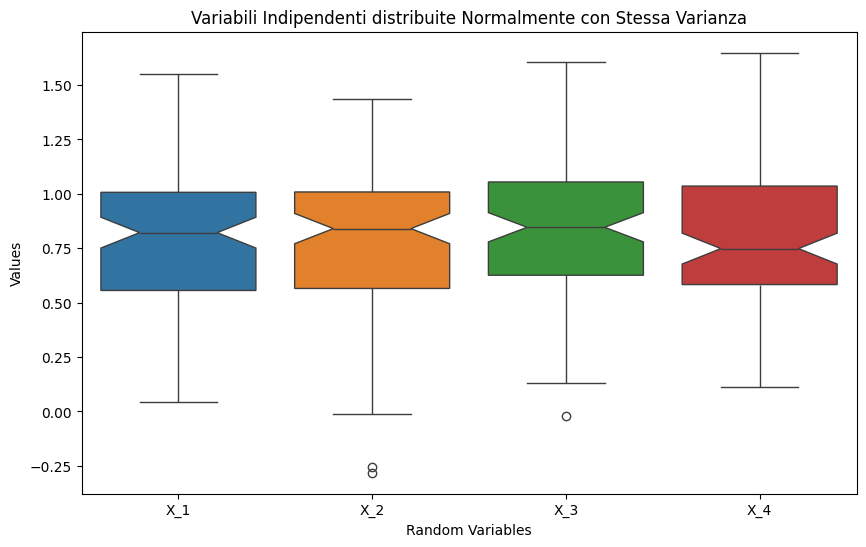

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop(columns=['Index']), notch=True)

plt.title("Variabili Indipendenti distribuite Normalmente con Stessa Varianza")
plt.xlabel("Random Variables")
plt.ylabel("Values")
plt.show()

In [43]:
df.drop(columns=['Index']).describe()

,X_1,X_2,X_3,X_4
count,100.000000,100.000000,100.000000,100.000000
mean,0.791790,0.782639,0.829316,0.802692
std,0.331912,0.335075,0.327502,0.350614
min,0.043293,-0.281425,-0.022263,0.114507
25%,0.555926,0.565193,0.625905,0.583083
50%,0.821644,0.840238,0.846239,0.748333
75%,1.006917,1.008533,1.054503,1.035575
max,1.551541,1.433671,1.605139,1.648295


In [44]:
def notch_extremes(data):
    q1 = data.quantile(0.25)
    q2 = data.quantile(0.50)
    q3 = data.quantile(0.75)
    iqr = q3 - q1

    lower_extreme = q2 - 1.57 * iqr / np.sqrt(len(data))
    upper_extreme = q2 + 1.57 * iqr / np.sqrt(len(data))

    print(f"Estremo inferiore: {lower_extreme}")
    print(f"Estremo superiore: {upper_extreme}\n")

for col in columns:
    print(f"Notch di {col}:")
    notch_extremes(df[col])

Notch di X_1:
Estremo inferiore: 0.7508382874496086
Estremo superiore: 0.8924492940618943

Notch di X_2:
Estremo inferiore: 0.770633846540682
Estremo superiore: 0.9098427918966171

Notch di X_3:
Estremo inferiore: 0.7789492237705545
Estremo superiore: 0.9135292003254175

Notch di X_4:
Estremo inferiore: 0.6772922697019027
Estremo superiore: 0.8193747043058622



In [45]:
ANOVA_12345_tbbl = pd.melt(df, id_vars = ['Index'], var_name = 'Group', value_name = 'Value')
ANOVA_12345_tbbl = ANOVA_12345_tbbl.sort_values(by = ['Index', 'Group'])
ANOVA_12345_tbbl = ANOVA_12345_tbbl.reset_index(drop = True)
ANOVA_12345_tbbl

,Index,Group,Value
0,1,X_1,1.247792
1,1,X_2,0.494540
2,1,X_3,0.340785
3,1,X_4,0.262189
4,2,X_1,0.844625
...,...,...,...
395,99,X_4,0.561629
396,100,X_1,0.558313
397,100,X_2,1.255318
398,100,X_3,1.082406


In [46]:
# calcolo statistiche di gruppo dal file tbble
group_stats = ANOVA_12345_tbbl.groupby('Group').agg(
    count=('Value', 'count'),
    mean=('Value', 'mean'),
    sd=('Value', 'std')
).reset_index()

alpha = 0.01

# calcolo std err e limiti di confidenza usando la ppf
group_stats['std_err'] = group_stats['sd'] / np.sqrt(group_stats['count'])
group_stats['ci_lower'] = group_stats['mean'] - t.ppf(1 - alpha / 2, group_stats['count'] - 1) * group_stats['std_err']
group_stats['ci_upper'] = group_stats['mean'] + t.ppf(1 - alpha / 2, group_stats['count'] - 1) * group_stats['std_err']


group_stats


,Group,count,mean,sd,std_err,ci_lower,ci_upper
0,X_1,100,0.791790,0.331912,0.033191,0.704617,0.878964
1,X_2,100,0.782639,0.335075,0.033507,0.694635,0.870643
2,X_3,100,0.829316,0.327502,0.032750,0.743301,0.915332
3,X_4,100,0.802692,0.350614,0.035061,0.710606,0.894777


In [47]:
anova_result = smf.ols('Value ~ Group', data=ANOVA_12345_tbbl).fit()
anova_table = sm.stats.anova_lm(anova_result)

anova_table

,df,sum_sq,mean_sq,F,PR(>F)
Group,3.0,0.122514,0.040838,0.360898,0.781281
Residual,396.0,44.810209,0.113157,NaN,NaN


In [48]:
tukey_res = pairwise_tukeyhsd(ANOVA_12345_tbbl['Value'], ANOVA_12345_tbbl['Group'], alpha = 0.01)

tukey_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
X_1,X_2,-0.0092,0.9975,-0.1582,0.1399,False
X_1,X_3,0.0375,0.8595,-0.1115,0.1866,False
X_1,X_4,0.0109,0.9958,-0.1382,0.16,False
X_2,X_3,0.0467,0.7603,-0.1024,0.1957,False
X_2,X_4,0.0201,0.9748,-0.129,0.1691,False
X_3,X_4,-0.0266,0.9439,-0.1757,0.1224,False


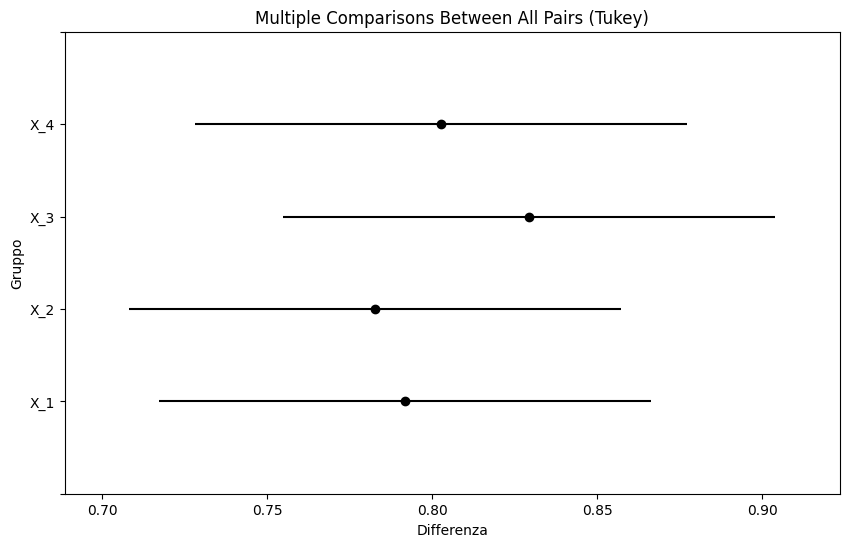

In [49]:
tukey_res.plot_simultaneous(ylabel = "Gruppo", xlabel = "Differenza")
plt.show()

In [50]:
SSb = anova_table.loc['Group', 'sum_sq']

df_between = anova_table.loc['Group', 'df']

# Verifica della distribuzione chi-quadro
p_value_between = chi2.sf(SSb, df_between)

print(f"SSb: {SSb}, df_between: {df_between}, p_value_between: {p_value_between}")

if p_value_between > alpha:
    print(f"\033[1mNon possiamo rigettare l'ipotesi nulla -> SSb segue una distribuzione chi-quadro con i corretti gradi di libertà. \033[0m")
else:
    print(f"\033[1mPossiamo rigettare l'ipotesi nulla -> SSb non segue una distribuzione chi-quadro con i corretti gradi di libertà. \033[0m")


SSb: 0.12251449729223947, df_between: 3.0, p_value_between: 0.9890050364520492
Non possiamo rigettare l'ipotesi nulla -> SSb segue una distribuzione chi-quadro con i corretti gradi di libertà. 
